# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
#This dataset represents 17 marketing campaigns spanning between May 2008 and November 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error
import warnings

from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

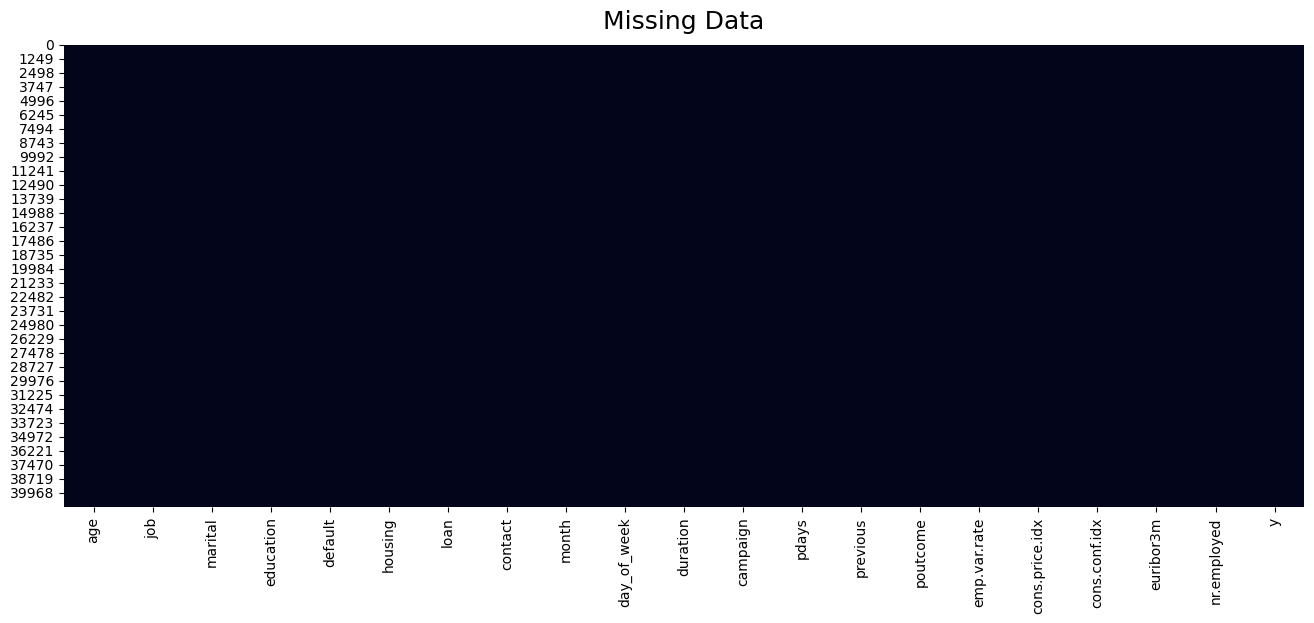

In [4]:
#plot null values
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.isna(), cbar=False)
heatmap.set_title('Missing Data', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [5]:
#given these data points I would make the following changes:

#Change "y" as a yes/no to 0=no, 1=yes and make the data an int64
df["y"] = df["y"].str.replace("no", "0").str.replace("yes", "1")
df['y'] = df['y'].astype('int')

#Drop na
df = df.dropna()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,57,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,37,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3,40,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,56,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [10]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


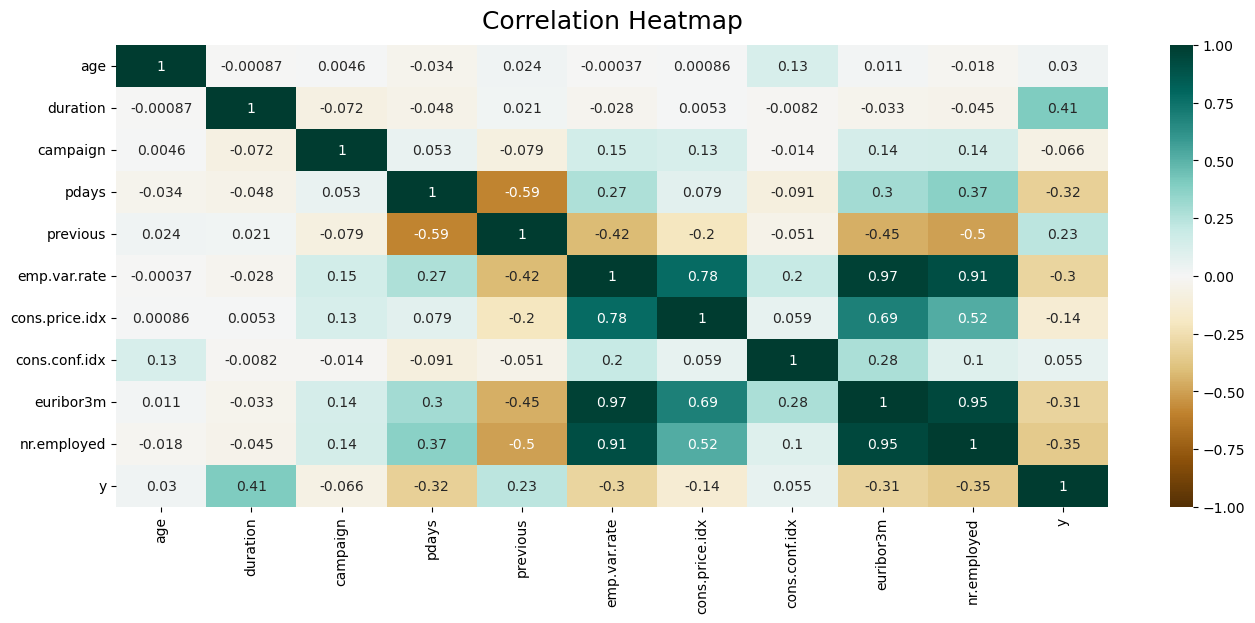

In [11]:
#create a heatmap of the correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [ ]:
#The business objective of this task is to identify what will lead to long term deposit subscriptions and align
# on they key variables to do that so we can be more targeted in our marketing campaign and reduce the number
# of contacts we are sending marketing to.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [14]:
#create a dataset using only columns 1-7, assuming column 0 is age and excluded since it's not column 1
df_features = df[['job','marital','education','default','housing','loan','contact']]
df_features.head()

,job,marital,education,default,housing,loan,contact
0,housemaid,married,basic.4y,no,no,no,telephone
1,services,married,high.school,unknown,no,no,telephone
2,services,married,high.school,no,yes,no,telephone
3,admin.,married,basic.6y,no,no,no,telephone
4,services,married,high.school,no,no,yes,telephone


In [15]:
#Get dummies for df_features
df_features = pd.get_dummies(df_features)
df_features.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
#Create a training and test set using df_features and df['y']
X_train, X_test, y_train, y_test = train_test_split(df_features, df['y'], random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [17]:
#Baseline for comparison
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
dummy.score(X_test, y_test)

0.8880256385354958

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [28]:
#Logistic Regression basic model on the data.
%time
logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_test, y_test)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 10 µs


0.8880256385354958

### Problem 9: Score the Model

What is the accuracy of your model?

In [21]:
#Accuracy of the model for training and test data
print ("Training accuracy",logreg.score(X_train, y_train))
print ("Testing accuracy",logreg.score(X_test, y_test))

Training accuracy 0.887119225664433
Testing accuracy 0.8880256385354958


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [25]:
#KNN model
%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
#printing the score of the model for the test data and training data
print ("Training accuracy",knn.score(X_train, y_train))
print ("Testing accuracy",knn.score(X_test, y_test))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
Training accuracy 0.8815836327732997
Testing accuracy 0.8753034864523648


In [26]:
#Decision Tree model
%time
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
#print the score of the model for the test data and training data
print ("Training accuracy",tree.score(X_train, y_train))
print ("Testing accuracy",tree.score(X_test, y_test))

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 1.91 µs
Training accuracy 0.8871839694409375
Testing accuracy 0.8879285228707391


In [27]:
#SVM model
%time
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
#print the score of the model for the test data and training data
print ("Training accuracy",svm.score(X_train, y_train))
print ("Testing accuracy",svm.score(X_test, y_test))

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.3 µs
Training accuracy 0.887119225664433
Testing accuracy 0.8880256385354958


In [30]:
#build a dataframe to compare the models
model_comparison = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
                                 'Train Time': [10, 3.81, 1.91, 9.3],
                                 'Train Accuracy': [logreg.score(X_train, y_train), knn.score(X_train, y_train), tree.score(X_train, y_train), svm.score(X_train, y_train)],
                                 'Test Accuracy': [logreg.score(X_test, y_test), knn.score(X_test, y_test), tree.score(X_test, y_test), svm.score(X_test, y_test)]})
model_comparison

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,10.00,0.887119,0.888026
1,KNN,3.81,0.881584,0.875303
2,Decision Tree,1.91,0.887184,0.887929
3,SVM,9.30,0.887119,0.888026


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [31]:
#improve the model by testing different hyperparameters
#KNN
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
knn.score(X_test, y_test)

0.8753034864523648

In [32]:
#improve the model by testing different hyperparameters
#KNN
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
knn.score(X_test, y_test)

0.8760804117704186

In [33]:
#improve the model by testing different hyperparameters
#KNN
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
knn.score(X_test, y_test)

0.886180440905118

In [ ]:
#Appears 10 nearest neighbors provides a better overall score with the test data

In [34]:
#build a model using different features, such as removing education
df_features2=df[['job','marital','default','housing','loan','contact']]
df_features2 = pd.get_dummies(df_features)
df_features2.head()

#create a training and test set using df_features2 and df['y']
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_features2, df['y'], random_state = 42)

#create a logistic regression model
logreg2 = LogisticRegression().fit(X_train2, y_train2)
logreg2.score(X_test2, y_test2)


0.8880256385354958

In [ ]:
#appears the model is slightly more accurate when removing education. As a side note, I couldn't find gender as mentioned above

##### Questions